# Computer Infrastructure Assessment

### Setup

Import required packages for effective operation of notebook

In [108]:
# Dates and times
import datetime as dt

# Data frames
import pandas as pd

# Yahoo finance data - yFinance (https://github.com/ranaroussi/yfinance)
import yfinance as yf

# Plots
import numpy as np

# Creating plots
import matplotlib.pyplot as plt

# Listing data files
import os


### Assessment Tasks

1. Write a function titled ``get_data()`` to download previous 5 day hourly data for the FAANG stocks and save into ``data`` folder, titled accordingly.
2. Plot the data for each stock, titling the function ``plot_data()``.
3. Write faang.py script to perform task 1 and 2.
4. Create GitHub Actions workflow to run script faang.yml every Saturday morning.

#### Problem 1. Funtion Creation

To create the ``get_data`` function, ``yf.download`` will be used, with different parameters specified, to align with the 5 day look back, and hourly data.

In [109]:
# Use yf.download to download hourly data over previos 5 days
#Source: https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html#yfinance.download
get_data = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period= '5d', interval= '1h')

# Show first 5 lines of the results
get_data.head()

/tmp/ipykernel_7666/762086023.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  get_data = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period= '5d', interval= '1h')
[*********************100%***********************]  5 of 5 completed


Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-08 14:30:00+00:00  277.559998  229.039993  317.950012  668.773499   
2025-12-08 15:30:00+00:00  277.459991  228.070007  315.869385  669.838013   
2025-12-08 16:30:00+00:00  277.230011  227.279907  313.019989  669.429993   
2025-12-08 17:30:00+00:00  276.970001  227.050003  312.832397  667.859985   
2025-12-08 18:30:00+00:00  276.359985  227.089996  313.609985  666.484985   

Price                                       High                          \
Ticker                          NFLX        AAPL        AMZN        GOOG   
Datetime                                                                   
2025-12-08 14:30:00+00:00  95.825302  279.669312  230.824005  321.230011   
2025-12-08 15:30:00+00:00  95.925003  277.880005  229.313507  317.899994   
2025-12-08 16:30:00+00:00  96.112000  277.819000  228.389999  316.160004   
2025-12-08 17:30:00+00:00  95.660004  277.849915  227.770004  313.989990   
2025-12-08 18:30:00+00:00  96.315002  276.949493  227.373993  314.269897   

Price                                             ...        Open              \
Ticker                           META       NFLX  ...        AAPL        AMZN   
Datetime                                          ...                           
2025-12-08 14:30:00+00:00  676.710022  99.820000  ...  278.168488  229.520004   
2025-12-08 15:30:00+00:00  670.770020  96.570000  ...  277.549988  229.029999   
2025-12-08 16:30:00+00:00  670.900024  96.529999  ...  277.470001  228.039001   
2025-12-08 17:30:00+00:00  670.209900  96.239998  ...  277.209991  227.270004   
2025-12-08 18:30:00+00:00  668.359924  96.504997  ...  276.949493  227.020004   

Price                                                          Volume  \
Ticker                           GOOG        META       NFLX     AAPL   
Datetime                                                                
2025-12-08 14:30:00+00:00  320.880005  669.684998  99.790001  6285926   
2025-12-08 15:30:00+00:00  317.899994  668.700012  95.820000  3326326   
2025-12-08 16:30:00+00:00  315.820099  669.880005  95.930000  1896481   
2025-12-08 17:30:00+00:00  313.043610  669.429993  96.120003  1999024   
2025-12-08 18:30:00+00:00  312.859985  667.750000  95.650002  1825108   

Price                                                           
Ticker                        AMZN     GOOG     META      NFLX  
Datetime                                                        
2025-12-08 14:30:00+00:00  5237392  3758988  2929014  18330581  
2025-12-08 15:30:00+00:00  2886442  2078465  1062264  12653429  
2025-12-08 16:30:00+00:00  2070338  2665657   690379   7657343  
2025-12-08 17:30:00+00:00  2032964  1384447   569351   5494339  
2025-12-08 18:30:00+00:00  2086023  1098322   542845   6449408  

[5 rows x 25 columns]

The above code can be seen to pull the requested data for the 5 listed stock prices (Facebook, Apple, Amazon, Netflix, Google) over the previous 5 days with 1 hour intervals. This is listed with the earliest dates first, up to the most recent data for data at the end of the list. This can be seen in the below. 

In [110]:
# Show last 3 rows
get_data.tail(3)

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-12 18:30:00+00:00  277.950012  226.850006  310.962799  645.309998   
2025-12-12 19:30:00+00:00  278.054993  226.712006  310.799988  645.349976   
2025-12-12 20:30:00+00:00  278.369995  226.190002  310.510010  644.239990   

Price                                       High                          \
Ticker                          NFLX        AAPL        AMZN        GOOG   
Datetime                                                                   
2025-12-12 18:30:00+00:00  95.555000  279.049988  227.375000  311.890015   
2025-12-12 19:30:00+00:00  95.665100  278.700012  227.160004  311.420013   
2025-12-12 20:30:00+00:00  95.205002  278.500000  226.755005  310.929993   

Price                                             ...        Open              \
Ticker                           META       NFLX  ...        AAPL        AMZN   
Datetime                                          ...                           
2025-12-12 18:30:00+00:00  648.500000  95.790001  ...  279.040009  226.990005   
2025-12-12 19:30:00+00:00  646.200012  95.839996  ...  277.950012  226.869995   
2025-12-12 20:30:00+00:00  645.820007  95.699997  ...  278.049988  226.720001   

Price                                                          Volume  \
Ticker                           GOOG        META       NFLX     AAPL   
Datetime                                                                
2025-12-12 18:30:00+00:00  311.649994  647.679993  95.445000  2354465   
2025-12-12 19:30:00+00:00  310.970001  645.320007  95.559998  2391168   
2025-12-12 20:30:00+00:00  310.820007  645.460022  95.669998  2787871   

Price                                                          
Ticker                        AMZN     GOOG    META      NFLX  
Datetime                                                       
2025-12-12 18:30:00+00:00  1616710   809271  604159  10145800  
2025-12-12 19:30:00+00:00  1797710   722659  670874         0  
2025-12-12 20:30:00+00:00  2808944  1398728  982613   4024839  

[3 rows x 25 columns]

With the required information now downloaded, the following code can then be used to save it as per the required naming convention; ``YYYMMDD-HHmmss.csv``. To do this, the current time which is the same time as the script is ran, needs to be determined using ``datetime``.

In [111]:
# Use datetime module to confirm current time.
# Source: https://docs.python.org/3/library/datetime.html#format-codes
now = dt.datetime.now()

# Show output
now


datetime.datetime(2025, 12, 14, 13, 27, 38, 144729)

This now needs to be converted into a string, in the correct format using ``now.strftime`` ([Source](https://www.w3schools.com/python/python_datetime.asp)).

Per the format codes, the ``now`` datetime can be converted into a string using:
- %Y - for year
- %m - for month
- %d - for date of month
- %H - for hour (24 hour format)
- %M - for minute
- %S - for second

In [112]:
# Convert date and time into string.
now.strftime('%Y%m%d-%H%M%S')

'20251214-132738'

The above 2 codes can be merged for simplification, but still generating the exact time the code is ran, and capture it in a string format. 

In [113]:
# Capture date and time code is ran, and present as a string
time_stamp = dt.datetime.now().strftime('%Y%m%d-%H%M%S')

# Show
time_stamp

'20251214-132738'

This can then be expanded to be used as the filename, adding ``.csv`` at the end, along with specifying the location for the file to be saved using ``data/``.

``data/`` directs to the the data folder. The ``data`` folder is located in the root of the repository, which so too is this notebook and will also be ``faang.py`` so there is no need to direct the file up a level before specifying the data folder.

In [114]:
# File location is the 'data' folder, and will be a .csv file.
'data/' + dt.datetime.now().strftime('%Y%m%d-%H%M%S') + '.csv'

'data/20251214-132738.csv'

All this can now be pulled together, to save the previous 5 days for the given stocks.

In [115]:
# Pull previous 5 days of data
get_data = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period= '5d', interval= '1h', auto_adjust=True)

# Generate time stamp of when data was pulled and convert to string
time_stamp = dt.datetime.now().strftime('%Y%m%d-%H%M%S')

# Save into 'data' folder as a .csv file, titling file with time_stamp.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
get_data.to_csv('data/' + time_stamp + '.csv')

[*********************100%***********************]  5 of 5 completed


### Problem 2: Plotting the Data

To plot the data, the first step is to confirm the list of files in the 'data' folder. This can be done by using ``os.listdir`` and specifying the data folder path 

Source: https://www.geeksforgeeks.org/python/python-os-listdir-method/.

In [116]:
# Specify data folder as location to find the file.
#datadir = './data/'

# Specify the filename, which is the same time stamp as when the data is pulled.
#filename=f'{time_stamp}.csv'

In [117]:
# Read in the CSV file
#df= pd.read_csv(datadir + filename)

#show first 5 rows
#df.head()

In [118]:
data_files = os.listdir('./data/')

# Show
data_files

['20251209-185939.csv',
 '20251214-132304.csv',
 '20251214-132738.csv',
 '20251214-130907.csv',
 '20251210-190038.csv',
 '20251214-132236.csv',
 '20251213-092708.csv',
 '20251214-130914.csv']

The above shows the list in the data folder, but to ensure the latest one is used for the plot, the ``.sort()`` ([source](https://www.geeksforgeeks.org/python/sort-in-python/)) will be used. Using ``reverse=True`` will arrange them in the most recent to the top.

In [119]:
# Sort the list of files.
data_files.sort(reverse=True)

# Show rearranged list.
data_files

['20251214-132738.csv',
 '20251214-132304.csv',
 '20251214-132236.csv',
 '20251214-130914.csv',
 '20251214-130907.csv',
 '20251213-092708.csv',
 '20251210-190038.csv',
 '20251209-185939.csv']

Now it can be seen that the list has been arranged, it is possible to specify the first filename ``[0]``, which is the most recent.

Prior to doing the plot, a quick check can be done to ensure the information is being pulled in correctly.

In [120]:
# Specify first file in data_files group (index=0)
latest = data_files[0]

# Specify data folder as location to find the file.
datadir = './data/'

# Read in the CSV file
df= pd.read_csv(datadir + latest)

#show first 3 rows
df.head(3)

,Price,Close,Close.1,Close.2,Close.3,Close.4,High,High.1,High.2,High.3,...,Open,Open.1,Open.2,Open.3,Open.4,Volume,Volume.1,Volume.2,Volume.3,Volume.4
0,Ticker,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,...,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,NFLX
1,Datetime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-12-08 14:30:00+00:00,277.55999755859375,229.0399932861328,317.95001220703125,668.7734985351562,95.82530212402344,279.6693115234375,230.82400512695312,321.2300109863281,676.7100219726562,...,278.1684875488281,229.52000427246094,320.8800048828125,669.6849975585938,99.79000091552734,6285926,5237392,3758988,2929014,18330581


The above is correct however, it can be seen that rows 0 and 1 are the headers, with row 2 being redundant. This needs to be factored into the ``read_csv`` command.

In [121]:
# Read in the CSV file
# header=[0,1] species the use of row 0 and 1 as the column names
# skiprows=[2] skips row 2
# Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
df= pd.read_csv(datadir + latest, index_col=0, header=[0,1], skiprows=[2])

# Show first 3 rows
df.head(3)

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
2025-12-08 14:30:00+00:00  277.559998  229.039993  317.950012  668.773499   
2025-12-08 15:30:00+00:00  277.459991  228.070007  315.869385  669.838013   
2025-12-08 16:30:00+00:00  277.230011  227.279907  313.019989  669.429993   

Price                                       High                          \
Ticker                          NFLX        AAPL        AMZN        GOOG   
2025-12-08 14:30:00+00:00  95.825302  279.669312  230.824005  321.230011   
2025-12-08 15:30:00+00:00  95.925003  277.880005  229.313507  317.899994   
2025-12-08 16:30:00+00:00  96.112000  277.819000  228.389999  316.160004   

Price                                             ...        Open              \
Ticker                           META       NFLX  ...        AAPL        AMZN   
2025-12-08 14:30:00+00:00  676.710022  99.820000  ...  278.168488  229.520004   
2025-12-08 15:30:00+00:00  670.770020  96.570000  ...  277.549988  229.029999   
2025-12-08 16:30:00+00:00  670.900024  96.529999  ...  277.470001  228.039001   

Price                                                          Volume  \
Ticker                           GOOG        META       NFLX     AAPL   
2025-12-08 14:30:00+00:00  320.880005  669.684998  99.790001  6285926   
2025-12-08 15:30:00+00:00  317.899994  668.700012  95.820000  3326326   
2025-12-08 16:30:00+00:00  315.820099  669.880005  95.930000  1896481   

Price                                                           
Ticker                        AMZN     GOOG     META      NFLX  
2025-12-08 14:30:00+00:00  5237392  3758988  2929014  18330581  
2025-12-08 15:30:00+00:00  2886442  2078465  1062264  12653429  
2025-12-08 16:30:00+00:00  2070338  2665657   690379   7657343  

[3 rows x 25 columns]

This is now correct, and can be used for the plot.

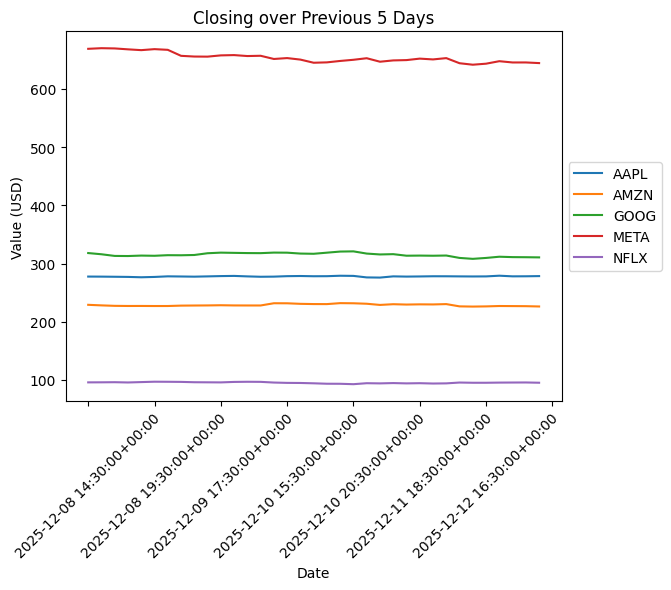

In [ ]:
# Specify first file in data_files group (index=0)
latest = data_files[0]

# Specify data folder as location to find the file.
datadir = './data/'

# Read in the CSV file
df= pd.read_csv(datadir + latest, index_col=0, header=[0,1], skiprows=[2])

# Plot the 'close' data and adjust visuals.
# Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
plot_data = df['Close'].plot(title = 'Closing over Previous 5 Days', xlabel='Date', ylabel='Value (USD)')

# Rotate x-axis lables 45°
plt.xticks(rotation=45)

# Move legend off chart area
# Source: https://stackoverflow.com/questions/25068384/bbox-to-anchor-and-loc-in-matplotlib
plot_data.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Plot file name using same time_stamp as data saving
filename = "./plots/" + time_stamp + ".png"

# Save figure.
plt.savefig(filename, dpi=500)

### Problem 3: Create Script

For the script, `faang.py` was created in the main repository. Within this, the above three code lines were copied over:
- The first to pull the 5 day, hourly data for each of the stock.
- The second line to generate a timestamp of when ran.
- The final line to save the data into the `data` folder.

To run each of these, specific packages are also needed, so these too were added to the `faang.py` code:
- `yfinance` to pull the required stock data.
- `datetime` to create the timestamp.

This results in the below code.

```python

import datetime as dt

import yfinance as yf

get_data = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period= '5d', interval= '1h')

time_stamp = dt.datetime.now().strftime('%Y%m%d-%H%M%S')

get_data.to_csv('data/' + time_stamp + '.csv')

```

This `faang.py` code can be ran as normal using `python faang.py` in the main terminal however, to have the code operate when the user types `./faang.py`, firstly a shebang line (`#! /usr/bin/env python`) needs to be added to the very beginning of the code.

By adding the shebang line, it specifies the path to Python and means the user does not have to type `python` before the script name [source](https://realpython.com/python-shebang/).

One final check to ensure the script functions is to allow the file have permission to execute. To do so, in the same location where the `faang.py` script is located, in the terminal `chmod u+x faang.py` was ran. This changes the script to allow the user `u` to execute `x` the script.

To ensure this worked, `ls -l faang.py` was ran in the terminal. It outputted below, confimring it is executable given the `x` in `rwx`. 

```-rwxrw-rw- 1 codespace codespace 495 Nov  7 13:59 faang.py```

The script can now be ran in the terminal by simply typing `./faang.py`.

# End